In [1]:
                                                         # jupyter v1.0.0
import pandas as pd                                      # v1.4.3
import numpy as np
import geopandas as gpd  # will I use this?                v0.8.2
from matplotlib import pyplot as plt                     # v3.5.2
import matplotlib.patches as mpatches
import folium                                            # v0.12.1.post1

In [2]:
df = pd.read_csv('cleaned-case-data_0801.csv', sep=',', index_col='Case number')
df.head(3)

,Unnamed: 0,Incident location,Incident date,Homicide date,Gender,Race/Ethnicity,Law enforcement agency,details,Age,Hair color,...,Nickname or alias,Date of birth,Height,Weight,age_bin,latitude,longitude,city,state,date bin
Case number,,,,,,,,,,,,,,,,,,,,,
618,618.0,3540 Reading Road,2011-01-02,1/2/2011,Male,Black,Cincinnati Police Department,Twenty two year old Rafeal Ross was shot at 3...,22.0,NaN,...,NaN,NaN,NaN,NaN,"(20, 30]",39.14577,-84.48959,Cincinnati,Ohio,10-14
632,632.0,5438 Madison Road,2011-05-26,5/26/2011,Male,Black,Cincinnati Police Department,Nineteen year old David Gould was shot at 438...,19.0,NaN,...,NaN,NaN,NaN,NaN,"(10, 20]",39.16159,-84.39965,Cincinnati,Ohio,10-14
622,622.0,201 Peete Street,2011-03-01,3/1/2011,Male,Black,Cincinnati Police Department,Twenty five year old Patrick Massey was shot ...,25.0,NaN,...,NaN,NaN,NaN,NaN,"(20, 30]",39.11554,-84.51335,Cincinnati,Ohio,10-14


In [3]:
ages = [0, 10, 20, 30, 40, 50, 70, 110] 
age_bin = pd.cut(df['Age'], bins=ages)
binned = pd.crosstab(age_bin,df['Gender'])
binned

Gender,Female,Male
Age,,
"(0, 10]",2,4
"(10, 20]",5,56
"(20, 30]",16,165
"(30, 40]",14,57
"(40, 50]",13,39
"(50, 70]",11,42
"(70, 110]",7,14


In [4]:
a = ['0-10', '11-20','21-30', '31-40', '41-50', '51-70', '+71']
binned['Age'] =a
binned.set_index('Age', inplace=True)
binned

Gender,Female,Male
Age,,
0-10,2,4
11-20,5,56
21-30,16,165
31-40,14,57
41-50,13,39
51-70,11,42
+71,7,14


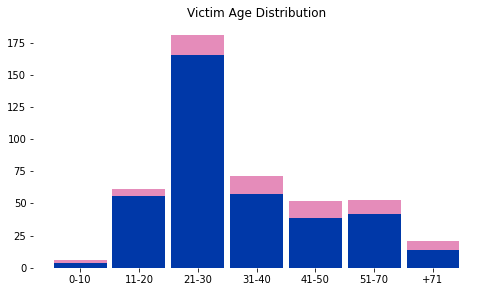

In [5]:
colors = ['#0038A8', '#e58cba'] #blue, pink
fig,ax = plt.subplots(figsize=(8, 4.5))
ax.bar(a, binned[' Male'], width=0.9, color=colors[0])
ax.bar(a, binned[' Female'], bottom=binned[' Male'], width=0.9, color=colors[1])
ax.set_title('Victim Age Distribution')
plt.xticks(range(7), a)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.savefig('AgeDistribution.png',dpi=100)
plt.show()

In [ ]:
binned[' Male'].sum() / (binned[' Male'].sum() + binned[' Female'].sum())

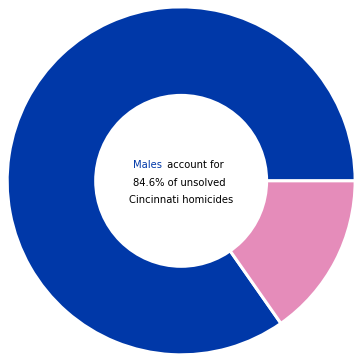

In [6]:
plt.pie([binned[' Male'].sum(), binned[' Female'].sum()], colors=colors ,wedgeprops={'linewidth': 3, 'edgecolor': 'white' },
       pctdistance=0.2, radius=2) 
donut = plt.Circle((0,0), 1, fc='white')
plt.annotate('Males', (-0.55,0.15), color=colors[0])
plt.annotate(' account for', (-0.2,0.15))
plt.annotate('84.6% of unsolved', (-0.55,-0.05))
plt.annotate('Cincinnati homicides', (-0.6,-0.25))
fig = plt.gcf()
fig.gca().add_artist(donut)
plt.savefig('SexDistribution.png', dpi=100, bbox_inches='tight')
plt.show()

In [8]:
df['Incident date'] = df['Incident date'].astype('datetime64[ns]')
years_series = pd.value_counts(df['Incident date'].dt.year)
years_df = pd.DataFrame({'Year': years_series.index, 'Homicide Count': years_series.values})
years_df['Year'] = years_df['Year'].astype('int')
years_df.head()

,Year,Homicide Count
0,2011,28
1,2002,26
2,2008,25
3,2010,23
4,2004,23


In [9]:
years_df.loc[years_df['Homicide Count'].idxmax()]

Year              2011
Homicide Count      28
Name: 0, dtype: int64

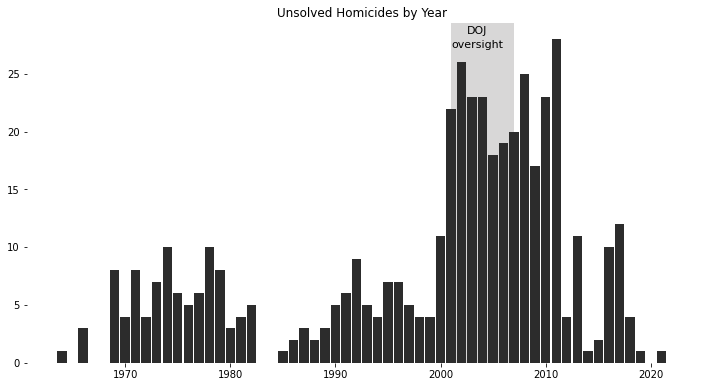

In [10]:
fig, ax = plt.subplots(figsize=(12,6.25))
ax.axvspan(2001, 2007, facecolor='#7e7c7c10', alpha=0.3)
ax.bar(years_df['Year'], years_df['Homicide Count'], width=0.9, color='#2C2C2C')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_title('Unsolved Homicides by Year')
ax.text(2002.5, 28.5, 'DOJ', color='black', fontsize=11)  
ax.text(2001, 27.25, 'oversight', color='black', fontsize=11)
plt.savefig('CasesByYear.png', dpi=100)
plt.show()

In [11]:
months_series = pd.value_counts(df['Incident date'].dt.month)
months_df = pd.DataFrame({'Month': months_series.index, 'Homicide Count':months_series.values})
months_df.sort_values('Homicide Count', ascending=False, inplace=True)
months_df['Month'] = months_df['Month'].astype(int)

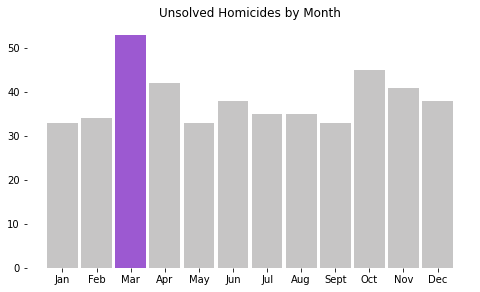

In [13]:
mo = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# bar(color) indexes from sorted data
month_colors = ['#9C59D1','#7e7c7c70', '#7e7c7c70', '#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70','#7e7c7c70',
                '#7e7c7c70','#7e7c7c70','#7e7c7c70',]
fig,ax = plt.subplots(figsize=(8,4.5))
ax.bar(months_df['Month'], months_df['Homicide Count'], width=0.9, color=month_colors)
# set x labels. bar(tick_label) doesn't like strings
plt.xticks(range(1,13), mo)
ax.set_title('Unsolved Homicides by Month')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.savefig('CasesByMonth.png', dpi=100)
plt.show()

In [22]:
by_race = pd.DataFrame(df.groupby('Race/Ethnicity').size()).transpose()
by_race

Race/Ethnicity,Asian,Black,White
0,1,338,115


In [26]:
338/(338+115+1)

0.7444933920704846

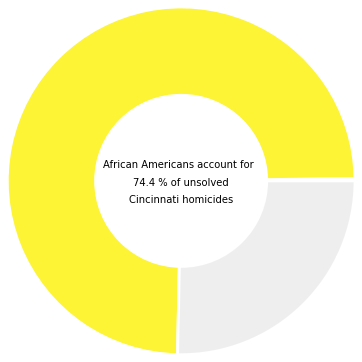

In [27]:
colors2 = ['#cc94f8', '#FCF434', '#7e7c7c20'] # ' Asian', ' Black', ' White'
plt.pie(by_race.iloc[0], colors=colors2 ,wedgeprops={'linewidth': 3, 'edgecolor': 'white' },
       pctdistance=0.2, radius=2) 
donut = plt.Circle((0,0), 1, fc='white')
plt.annotate('African Americans', (-0.9,0.15))
plt.annotate(' account for', (0.15,0.15))
plt.annotate('74.4 % of unsolved', (-0.55,-0.05))
plt.annotate('Cincinnati homicides', (-0.6,-0.25))
fig = plt.gcf()
fig.gca().add_artist(donut)
plt.savefig('CasesByRace.png', dpi=100,bbox_inches='tight')
plt.show() 

In [24]:
blues = {'<2':'#0038A8', '2-6':'#0038A8D8', '7-9':'#0038A8BF','10-14': '#0038A840',
         '+15': '#0038A820', 'edge': '#8aa0ca'}
pinks = {'<2':'#DA7AAC', '2-6':'#DA7AACD8', '7-9':'#DA7AACBF','10-14': '#DA7AAC40',
         '+15': '#DA7AAC20', 'edge' :'#e58cbaBF'} 
def add_circles(df, map_obj, color_dict):
    ''' expects a dataframe that at least has ['name', 'latitude', 'longitude'], 
        a map object to place them, and a dict of category colors.'''
    cases = list(df.index)
    for case in cases :
        folium.CircleMarker(
            location=[df.loc[case]['latitude'], df.loc[case]['longitude']],
            radius=7, popup=folium.Popup(("Case "+str(case)+": "+str(df.loc[case]['details'])), max_width=450),
            color=color_dict['edge'], # color_dict[df.loc[case]['date bin']],
            fill_color=color_dict[df.loc[case]['date bin']],
            fill_opacity=1
        ).add_to(map_obj)      

In [25]:
males_df = df[df['Gender']==' Male']
females_df = df[df['Gender']==' Female']
gender_maps = folium.Map(location=[39.103119,-84.512016], tiles="Stamen Toner", zoom_start=11)
add_circles(males_df, gender_maps, blues)
add_circles(females_df, gender_maps, pinks)
gender_maps